If you want to download the audio of a youtube video:

In [1]:
from __future__ import unicode_literals
import youtube_dl

In [2]:
angry_scenes_video = 'https://www.youtube.com/watch?v=n5_TB2fS94w'
sad_scenes_video = 'https://www.youtube.com/watch?v=xUp8dQlCN5A'
tedx1_video = 'https://www.youtube.com/watch?v=ls2wAp-e9Qw'
tedx2_video = 'https://www.youtube.com/watch?v=IHxAhBkys6E'
laCrise_video = 'https://www.youtube.com/watch?v=gvchW0BIlRM'
thenotebook_video = 'https://www.youtube.com/watch?v=thPq77e9g0s'
onetreehill_video = 'https://www.youtube.com/watch?v=bihWWT7maIQ'
friends_video = 'https://www.youtube.com/watch?v=Yp0kth7-zsM'

ydl_opts = {
    'format': 'bestaudio/best',
    'postprocessors': [{
        'key': 'FFmpegExtractAudio',
        'preferredcodec': 'wav',
        'preferredquality': '192',
    }],
}
with youtube_dl.YoutubeDL(ydl_opts) as ydl:
    ydl.download([thenotebook_video])

[youtube] thPq77e9g0s: Downloading webpage
[youtube] thPq77e9g0s: Downloading video info webpage


[download] Destination: _-thPq77e9g0s.webm
[download] 100% of 4.53MiB in 00:0036MiB/s ETA 00:005
[ffmpeg] Destination: _-thPq77e9g0s.wav
Deleting original file _-thPq77e9g0s.webm (pass -k to keep)


You can also split an audio into chunks of a specific duration, 
or combine different audios to make a longer one.

In [1]:
import io
import os
from pydub import AudioSegment
import numpy as np
import pandas as pd

In [2]:
def split_audio(data_path, file_name, chunk_duration=4000):
    original_audio = AudioSegment.from_wav(os.path.join(data_path, file_name))
    
    for i in range(int(len(original_audio)/(chunk_duration))):
        end = (i+1)*chunk_duration
        if end <= len(original_audio):
            chunk = original_audio[i*chunk_duration:end]
            chunk_name = file_name[:-4]+'_chunk'+str(i)+'.wav'
            chunk.export(os.path.join(data_path, chunk_name), format="wav")
    os.remove(os.path.join(data_path, file_name))
            
def combine_audios(data_path, audio_filenames, combined_audio_name):
    combined_audio = AudioSegment.from_wav(os.path.join(data_path, audio_filenames[0]))
    for i in range(1,len(audio_filenames)):
        if audio_filenames[i].endswith('.wav'):
            combined_audio += AudioSegment.from_wav(os.path.join(data_path, audio_filenames[i]))
    
    combined_audio.export(os.path.join(data_path, combined_audio_name), format="wav")

In [6]:
split_audio('/Users/rym.laabiyad/RogerVoice/data_2s/unlabelled/onetreehill/', 'onetreehill.wav', 2000)

In [3]:
root_data_path = '/Users/rym.laabiyad/RogerVoice/data_1s/labelled/additional/'

for folder in os.listdir(root_data_path):
    if not folder.startswith('.'):
        data_path = os.path.join(root_data_path, folder)
        for file_name in os.listdir(data_path):
            if file_name.endswith('.wav'):
                split_audio(data_path, file_name, 1000)

In [5]:
from pydub import AudioSegment
from pydub.silence import split_on_silence
import os

In [7]:
data_path = '/Users/rym.laabiyad/RogerVoice/data/'
audio_filename = 'angry.wav'

audio = AudioSegment.from_wav(os.path.join(data_path, audio_filename))

chunks = split_on_silence(
    audio, 
    # Specify that a silent chunk must be at least 2 seconds or 2000 ms long.
    min_silence_len = 500,
    # Consider a chunk silent if it's quieter than -16 dBFS.
    silence_thresh = -16
)

for i, chunk in enumerate(chunks):
    print("Exporting chunk{0}.mp3.".format(i))
    chunk.export(".//chunk{0}.wav".format(i), format = "wav")

If you want to change to give the same labels to several chunks of the same original file:

In [3]:
import os

def label_file(original_path, new_path, filename):
    os.system('mv {0} {1}'.format(os.path.join(original_path, filename), os.path.join(new_path, filename)))

In [5]:
original_path = '/Users/rym.laabiyad/RogerVoice/data_1s/unlabelled/onetreehill'
file_root = 'onetreehill_chunk'
emotion = 'inaudible'
new_path = os.path.join('/Users/rym.laabiyad/RogerVoice/data_1s/labelled/onetreehill', emotion)
    
for i in range(0, 10):
    filename = file_root+str(i)+'.wav'
    label_file(original_path, new_path, filename)

This is to download the dataset from the University of Toronto, 
then put each audio in the correct folder depending on the emotion it conveys.

In [2]:
from bs4 import BeautifulSoup
import requests
import os

data_path = '/Users/rym.laabiyad/RogerVoice/data_2s/labelled/UniversityOfToronto/'
base_url = 'https://tspace.library.utoronto.ca/'

for data_id in range(24488, 24502):
    print('id =', data_id)
    request  = requests.get(base_url + "handle/1807/" + str(data_id))

    data = request.text
    soup = BeautifulSoup(data)

    for link in soup.find_all('a'):
        file_name = link.get('href')
        
        if file_name.endswith('.wav'):  
            url = base_url + file_name
            r = requests.get(url)
            
            if file_name.endswith('ps.wav'):
                complete_path = os.path.join(data_path, 'surprised')
            elif file_name.endswith('fear.wav'):
                complete_path = os.path.join(data_path, 'scared')
            elif file_name.endswith('disgust.wav'):
                complete_path = os.path.join(data_path, 'disgusted')
            else:
                complete_path = os.path.join(data_path, file_name.split('_')[-1][:-4])
                
            file_path = os.path.join(complete_path, file_name.split('/')[-1])

            with open(file_path, 'wb') as f:
                for chunk in r.iter_content(chunk_size=128):
                    f.write(chunk)     

id = 24488
id = 24489
id = 24490
id = 24491
id = 24492
id = 24493
id = 24494
id = 24495
id = 24496
id = 24497
id = 24498
id = 24499
id = 24500
id = 24501


The same can be done for the 12 actors dataset.

In [6]:
labelled_data_path = '/Users/rym.laabiyad/RogerVoice/data/labelled/'

data_path_actors = 'Audio_Speech_Actors_01-24/'

labels_dict = {1: 'neutral', 2: 'neutral', 3: 'happy', 4: 'sad', 5: 'angry', 
               6: 'fear', 7: 'disgust', 8: 'surprised'}

In [ ]:
root_path = os.path.join(labelled_data_path, data_path_actors)

for key, value in labels_dict.items():
    try:
        os.mkdir(os.path.join(root_path, value))
    except FileExistsError:
        pass
    
for foldername in os.listdir(path):
    if foldername.startswith('Actor_'):      
        complete_path = os.path.join(root_path, foldername)
        
        for filename in os.listdir(complete_path):
            if filename.endswith('.wav'):
                emotion = int(filename[7])
                new_path = os.path.join(root_path, labels_dict[emotion])
                os.rename(os.path.join(complete_path, filename), os.path.join(new_path, filename))

Delete files that were last modified on March the 22nd

In [17]:
import time
import os

def remove_files_by_date(root_data, month, day):
    for folder in os.listdir(root_data_path):
        if not folder.startswith('.'):
            data_path = os.path.join(labelled_data_path, folder)
            for file in os.listdir(data_path):
                last_modif_time = time.gmtime(os.path.getmtime(os.path.join(data_path, file)))
                if last_modif_time[1] == month and last_modif_time[2] == day:
                    os.remove(os.path.join(data_path, file))

In [ ]:
labelled_data_path = '/Users/rym.laabiyad/RogerVoice/data/labelled/Audio_Speech_Actors_01-24/'

remove_files_by_date(labelled_data_path, 3, 22)

In [2]:
from bs4 import BeautifulSoup
import requests
import os

root_path = '/Users/rym.laabiyad/RogerVoice/data/labelled/4men/'
base_url = 'http://kahlan.eps.surrey.ac.uk/savee/Data/AudioData/'
folders = {'DC': 'neutral', 'JE': 'sad', 'JK': 'happy', 'KL': 'angry'}

for key, emotion in folders.items():
    data_path = os.path.join(root_path, emotion)
    request  = requests.get(base_url + key, auth=('guest2savee', 'welcome!'))
    data = request.text
    soup = BeautifulSoup(data)

    for link in soup.find_all('a'):
        file_name = link.get('href')
        if file_name.endswith('.wav'):
            url = base_url + file_name
            file_path = os.path.join(data_path, file_name)

            r = requests.get(url)
            with open(file_path, 'wb') as f:
                for chunk in r.iter_content(chunk_size=128):
                    f.write(chunk)   

http://kahlan.eps.surrey.ac.uk/savee/Data/AudioData/DC


ConnectionError: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response',))

In [24]:
import librosa
import librosa.display
import os
import matplotlib.pyplot as plt
import numpy as np

root_data_path = '/Users/rym.laabiyad/RogerVoice/data_1s/labelled/'

In [39]:
def plot_waveform(path):
    audio_data, sampling_rate = librosa.load(path)
    librosa.display.waveplot(audio_data, sr=sampling_rate)
    img_path = path[:-4] + '_waveplot.png'
    plt.savefig(os.path.join(labelled_data_path, img_path))
    
    return img_path
    
    
def plot_spectral(path):
    audio_data, sampling_rate = librosa.load(path)
    d = librosa.amplitude_to_db(np.abs(librosa.stft(audio_data)), ref=np.max)
    plt.title(path.split('/')[-2])
    librosa.display.specshow(d, sr=sampling_rate, y_axis='log')
    

def plot_mfcc(path):
    audio_data, sample_rate = librosa.load(path)
    mfcc = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=12)
    plt.title(path.split('/')[-2])
    librosa.display.specshow(mfcc[1:,:], sr=sample_rate, y_axis='log')

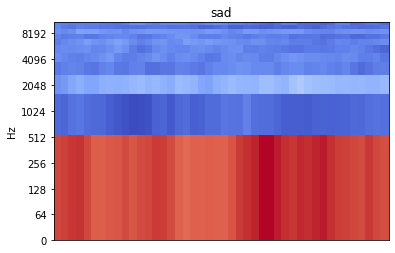

In [40]:
plot_mfcc('/Users/rym.laabiyad/RogerVoice/data_1s/labelled/youtube/sad/forrestgump_chunk33_chunk0.wav')

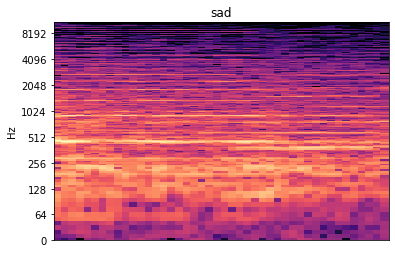

In [41]:
plot_spectral('/Users/rym.laabiyad/RogerVoice/data_1s/labelled/youtube/sad/forrestgump_chunk33_chunk0.wav')

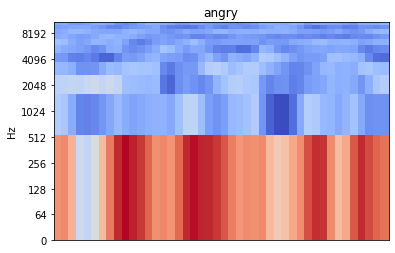

In [42]:
plot_mfcc('/Users/rym.laabiyad/RogerVoice/data_1s/labelled/youtube/angry/afewgoodmen_chunk7_chunk0.wav')

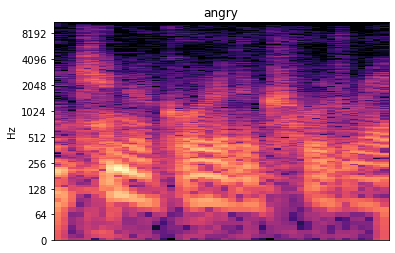

In [43]:
plot_spectral('/Users/rym.laabiyad/RogerVoice/data_1s/labelled/youtube/angry/afewgoodmen_chunk7_chunk0.wav')

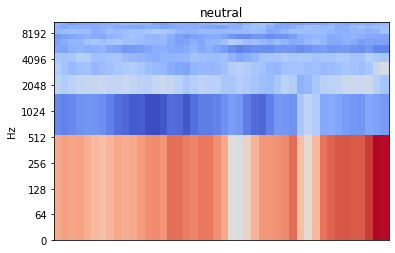

In [46]:
plot_mfcc('/Users/rym.laabiyad/RogerVoice/data_1s/labelled/youtube/neutral/tedx1_chunk8_chunk1.wav')

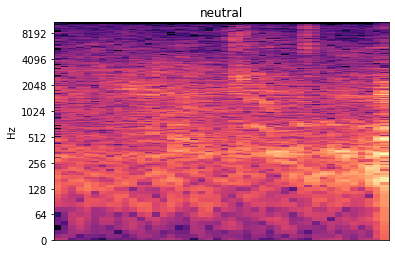

In [47]:
plot_spectral('/Users/rym.laabiyad/RogerVoice/data_1s/labelled/youtube/neutral/tedx1_chunk8_chunk1.wav')